In [1]:
#TODO note à moi-même : regarder les fonctions compare.py qui existent déjà ds mangaki
#revoir ce qu'est pdist et cdist; les différences

In [ ]:
#test pr 20 éléments (prendre pê moins que 70 pr rg matrice svd car tourne longtemps 
#mais moins de chance de tomber sur une singular matrix....)

In [ ]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values
from math import sqrt
from scipy.spatial.distance import pdist, squareform
import random

#param : taille rang svd
rang_svd=70

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()
svd =MangakiSVD(rang_svd)
X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)

Computing M: (1710 × 8347)
fill and center matrix [1169 ms]


In [ ]:
#copie_SVD=svd.VT.copy()
#####################################
####################################
####################################
nb_points=20
#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité similarity

def compute_similarity_coisine(SVD):
    nb_items = np.shape(SVD)[1]
    J = SVD.T.dot(SVD)
    D = np.sqrt(np.diag(J))
    similarity = J / D[:,np.newaxis].dot(D[np.newaxis,:])
    
    
    return similarity

similarity=compute_similarity_coisine(svd.VT)


#######################################
#####################################
#####################################

def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling withw
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X] 


###############################################
###############################################
###############################################

#liste de 10 éléments choisis en utilisant la dpp
items = range(0,nb_items)
sampled_items = sample_k(items, similarity, nb_points)

In [ ]:
sampled_items



In [ ]:
#liste de 10 éléments choisis aléatoirement
import random

uniform_items = list(range(similarity.shape[0]))
random.shuffle(uniform_items)
uniform_items = uniform_items[:nb_points]


#comparaison de la somme obtenue des distances

(pdist(svd.VT[:,sampled_items].T)).sum()

In [ ]:
uniform_items 



In [ ]:
(pdist(svd.VT[:,uniform_items].T)).sum()
#sample
#uniforms
#compare

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.clf()
plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], '+b')
plt.plot(svd.VT[0, uniform_items]+0.8, svd.VT[1, uniform_items], '+g')
# ! translation des pts choisis aléatoirement pr miexu voir les clusters, illisible graphiquement sinon

In [ ]:
plt.text(0, 0.02, 'avec DPP')
plt.text(0.6, 0.02, 'sans DPP (aléatoire)')

In [ ]:
#autre test : faire une moyenne de plusieurs tests successifs
#ne marche pas : toujours pas de chance : une singular_matrix apparait
#il serait peut-être bien de vérifier que la matrice est inversible ou alors utiliser ratings directement au lieu de svd.VT
# iteration=0
#tant que iteration !=10, si similarity inversible (utiliser sample_k et iteration++)



In [ ]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values
from math import sqrt
from scipy.spatial.distance import pdist, squareform
import random

#param : taille rang svd
rang_svd=20

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()

X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd =MangakiSVD(rang_svd)
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)


In [ ]:
#####################################
####################################
####################################
nb_points=10
#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité similarity

def compute_similarity_coisine(SVD):
    nb_items = np.shape(SVD)[1]
    J = SVD.T.dot(SVD)
    D = np.sqrt(np.diag(J))
    similarity = J / D[:,np.newaxis].dot(D[np.newaxis,:])
    
    
    return similarity

similarity=compute_similarity_coisine(svd.VT)


#######################################
#####################################
#####################################

def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling withw
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X] 


###############################################
###############################################
###############################################

#liste de 10 éléments choisis en utilisant la dpp
items = range(0,nb_items)


In [ ]:
#liste de 10 éléments choisis aléatoirement

uniform_items = list(range(similarity.shape[0]))
distance_sample=[]
distance_uniform=[]
for i in range(10):
    sampled_items = sample_k(items, similarity, nb_points)
    random.shuffle(uniform_items)
    uniform_items = uniform_items[:nb_points]


#comparaison de la somme obtenue des distances

    distance_sample.append((pdist(svd.VT[:,sampled_items].T)).sum())
    distance_uniform.append((pdist(svd.VT[:,uniform_items].T)).sum())

In [ ]:
#moyenne

# Dispersion statistique : diamètre d'ordre r

In [ ]:
#Utilisation de diamètre :   
#https://fr.wikipedia.org/wiki/Dispersion_statistique
#https://msh.revues.org/3553?file=1

essai, exemple : diamètre d'ordre 1

In [6]:
sampled_items=[ 929, 1126, 2483, 3511, 4460, 4858, 5163, 5340, 6674, 7700]
 
sampled_items


[929, 1126, 2483, 3511, 4460, 4858, 5163, 5340, 6674, 7700]

In [8]:
uniform_items=[2279, 5704, 8193, 1300, 6718, 3135, 1315, 7801, 472, 4580]
uniform_items


[2279, 5704, 8193, 1300, 6718, 3135, 1315, 7801, 472, 4580]

In [1]:
#nb_points est défini
#pdist(X, euclidian), cdist ? 


distance_sample = squareform(pdist(svd.VT[:,sampled_items].T))
distance_uniform = squareform(pdist(svd.VT[:,uniform_items].T))



NameError: name 'squareform' is not defined

In [11]:
#en cours de confection
n=len(sampled_items)
coefficient_sample=2/(n*(n-1))*(pdist(svd.VT[:,sampled_items].T).sum())
coefficient_sample

0.074192773388290528

In [12]:
coefficient_uniform=2/(n*(n-1))*(pdist(svd.VT[:,uniform_items].T).sum())
coefficient_uniform

0.12075655852475904

# Matrice creuse

"matrice creuse" user*item depuis ratings.csv


In [ ]:
import pandas
import numpy as np
from scipy.sparse import csc_matrix

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()

X=ratings[:,0:2]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1


row=ratings[:,0]
col=ratings[:,1]
rating_values = {'favorite': 2, 'like': 2, 'dislike': -2, 'neutral': 0.1, 'willsee': 0.5, 'wontsee': -0.5}
data=np.array([rating_values[rating] for rating in ratings[:,2]])
creuse=csc_matrix((data, (row, col)), shape=(nb_users, nb_items)).toarray()


# Test avec les + populaires

demande de jj

In [32]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()



In [33]:
svd =MangakiSVD(10)
X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)



Computing M: (1710 × 8347)
fill and center matrix [802 ms]
Shapes (1710, 10) (10,) (10, 8347)
factor matrix [26463 ms]


In [47]:
A=Work.objects.popular()[:50]
#A.tolist()
#A[0]
A[0].title



np.argwhere(works== A[0].title)[0][0]



7988

array([ 2.,  2.,  0., ...,  0.,  0.,  2.])

<IPython.core.display.Javascript object>


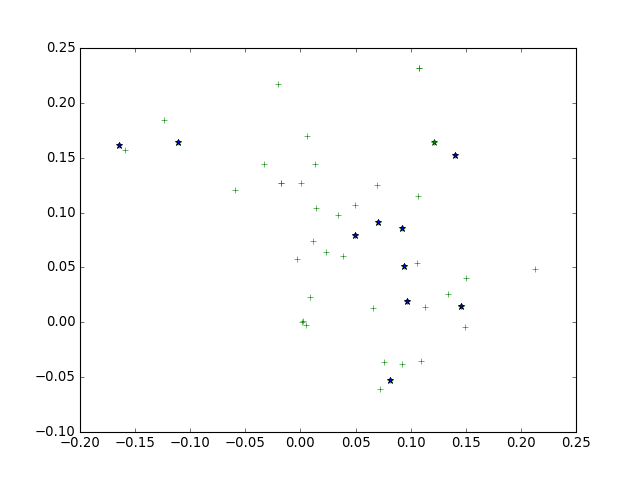

In [71]:
%matplotlib notebook
#ex avec DN
plt.plot(svd.VT[0,7988],svd.VT[1,7988],'*g')#anime


### Pr 50 éléments parmi les populaires : 

<IPython.core.display.Javascript object>


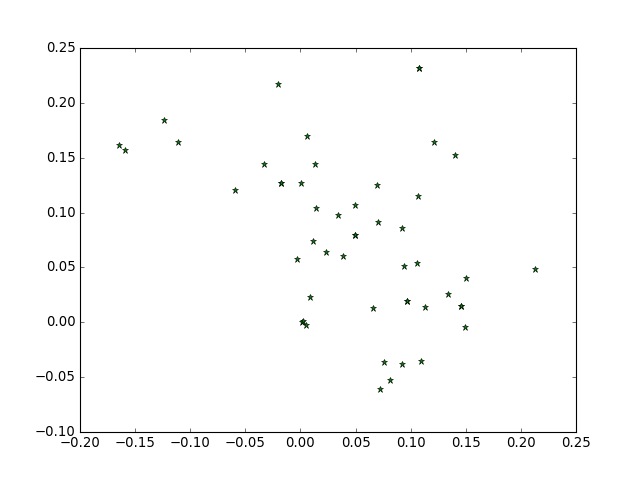

In [49]:
%matplotlib notebook
A=Work.objects.popular()[:50]
liste=[np.argwhere(works== A[i].title)[0][0] for i in range(0,50)]
plt.plot(svd.VT[0,liste],svd.VT[1,liste],'*g')


In [60]:
from scipy.spatial.distance import pdist, squareform

def compute_similarity_coisine(SVD):
    return 1 - squareform(pdist(SVD.T, metric='cosine'))

similarity=compute_similarity_coisine(svd.VT)

In [61]:
def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling withw
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X]

In [62]:
#liste de 10 éléments choisis en utilisant la dpp

sampled_items = sample_k(liste, similarity, 10)

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 50

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8347 but corresponding boolean dimension is 50

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 50

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 50



Etoile rouge : point tiré du sample dpp 

"+" vert : point des 501er anime \n

Etoile bleue : point tiré random uniform

<IPython.core.display.Javascript object>


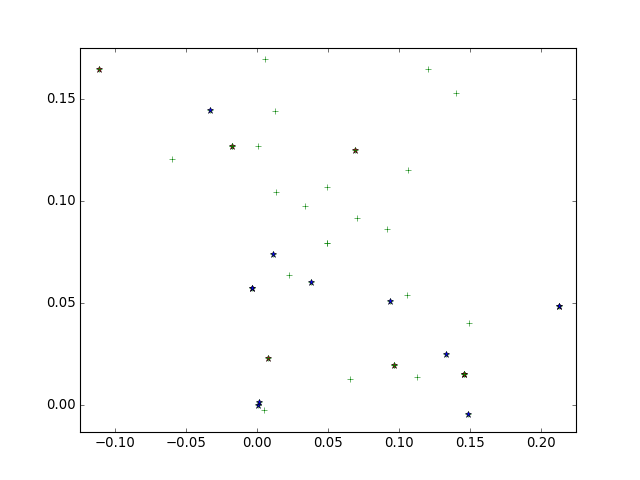

In [125]:
%matplotlib notebook
plt.clf()
plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], '*r')

In [126]:
plt.plot(svd.VT[0,liste],svd.VT[1,liste],'+g')

In [73]:
print('\n'.join(works[sampled_items,1]))

Princesse Mononoké
Fullmetal Alchemist
Naruto: Shippuuden
Le Château ambulant
One Piece
Dragon Ball Z
Hunter x Hunter
Toki wo Kakeru Shoujo
Fate/Zero
Highschool of the Dead


In [81]:
import random
uniform_items = liste
random.shuffle(uniform_items)
uniform_items = uniform_items[:10]

In [83]:
print('\n'.join(works[uniform_items,1]))

Code Geass: Hangyaku no Lelouch
Durarara!!
Death note
Fullmetal Alchemist: Brotherhood OVA Collection
Fullmetal Alchemist: Brotherhood
Les Enfants Loups : Ame & Yuki
Naruto: Shippuuden
FullMetal Alchemist
Bleach
Cowboy Bebop


In [127]:
plt.plot(svd.VT[0, uniform_items], svd.VT[1, uniform_items], '*b')

### Pour 100 éléments : 

In [174]:

A=Work.objects.popular()[:100]
liste=[np.argwhere(works== A[i].title)[0][0] for i in range(0,100)]


In [178]:
#liste de 10 éléments choisis en utilisant la dpp

sampled_items = sample_k(liste, similarity, 10)

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 100

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8347 but corresponding boolean dimension is 100

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 100

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 100



<IPython.core.display.Javascript object>


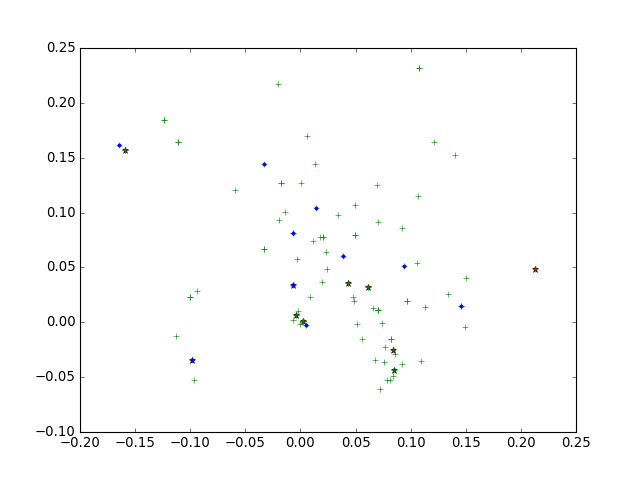

In [185]:
%matplotlib notebook
plt.clf()

plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], '*r')
plt.plot(svd.VT[0,liste],svd.VT[1,liste],'+g')

In [186]:
print('\n'.join(works[sampled_items,1]))

Princesse Mononoké
Fairy Tail
School Days
Porco Rosso
Clannad
Pokemon
GTO - Great Teacher Onizuka
Tamako Love Story
Ghost in the Shell
Terror in Resonance


Pr l'instant, après 2/3 essais, j'ai jamais eu deux animes ayant un nom similaire (FMA/FMA Brotherhood, Dragon ball/DBZ par ex, qui par contre st apparus ds uniform)

In [181]:
import random
uniform_items = liste
random.shuffle(uniform_items)
uniform_items = uniform_items[:10]
print('\n'.join(works[uniform_items,1]))

Soul Eater
Nausicaä of the Valley of the Wind
One Piece
Naruto: Shippuuden
Pokemon
D.Gray-man
School Days
Code Geass: Hangyaku no Lelouch
Angel Beats!
Les Enfants Loups : Ame & Yuki


In [187]:
plt.plot(svd.VT[0, uniform_items], svd.VT[1, uniform_items], '.b')

### Pr 150 éléments : 

In [188]:

A=Work.objects.popular()[:150]
liste=[np.argwhere(works== A[i].title)[0][0] for i in range(0,150)]

In [189]:
#liste de 10 éléments choisis en utilisant la dpp
#vérifier en-dessous que chaque item est différent des autres ds la liste (possibilité de doublon)
sampled_items = sample_k(liste, similarity, 10)

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 150

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8347 but corresponding boolean dimension is 150

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 150

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 150



<IPython.core.display.Javascript object>


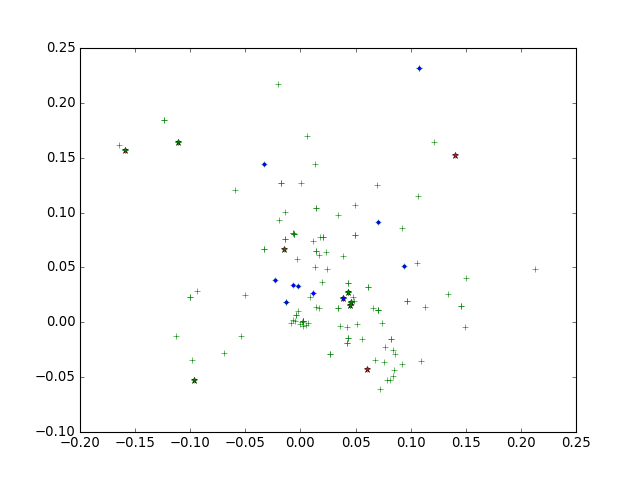

In [190]:
%matplotlib notebook
plt.clf()
plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], '*r')

In [191]:
plt.plot(svd.VT[0,liste],svd.VT[1,liste],'+g')


In [193]:
sampled_items


array([ 964,  498, 3745, 1641, 2874, 3795, 7958, 7122, 4934, 5264])

In [192]:
print('\n'.join(works[sampled_items,1]))

Fullmetal Alchemist: Brotherhood
Fairy Tail
Yu-Gi-Oh! GX
Bleach
5 centimètres par seconde
Tokyo Ghoul √A
Psycho-Pass 2
Durarara!! Specials
Fate/Stay Night Unlimited Blade Works
Death Parade


In [194]:
# vérifier rapidement/visuellement que deux mêmes items st présents ....
import random
uniform_items = liste
random.shuffle(uniform_items)
uniform_items = uniform_items[:10]
uniform_items

[6926, 5279, 3296, 198, 7081, 7703, 376, 1906, 2566, 4934]

In [195]:
print('\n'.join(works[uniform_items,1]))

Code Geass: Hangyaku no Lelouch
Death note
Pokemon
Accel World
Food wars
Toaru Majutsu no Index
Yu-Gi-Oh!
One Piece
L'Attaque des Titans
Fate/Stay Night Unlimited Blade Works


In [196]:
plt.plot(svd.VT[0, uniform_items], svd.VT[1, uniform_items], '.b')

In [197]:

np.linalg.det(squareform(pdist(svd.VT[:,sampled_items].T)))

-1.1005271185155534e-06

In [198]:
np.linalg.det(squareform(pdist(svd.VT[:,uniform_items].T)))



-9.7330511419462274e-07

In [200]:
distance_sample = squareform(pdist(svd.VT[:,sampled_items].T))
distance_uniform = squareform(pdist(svd.VT[:,uniform_items].T))

In [201]:
#en cours de confection
n=len(sampled_items)
coefficient_sample=2/(n*(n-1))*(pdist(svd.VT[:,sampled_items].T).sum())
coefficient_sample

0.27078550781154692

In [202]:
coefficient_uniform=2/(n*(n-1))*(pdist(svd.VT[:,uniform_items].T).sum())
coefficient_uniform

0.24486066538030776